In [175]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Kununu_Fashion_and_Retail.csv')

# Filter Data for current Hugo Boss employees
hugo_boss_reviews = data[data['company_name'].str.lower().str.contains('hugo boss')]
hugo_boss_reviews = hugo_boss_reviews[hugo_boss_reviews["employment_status"] == "current"]

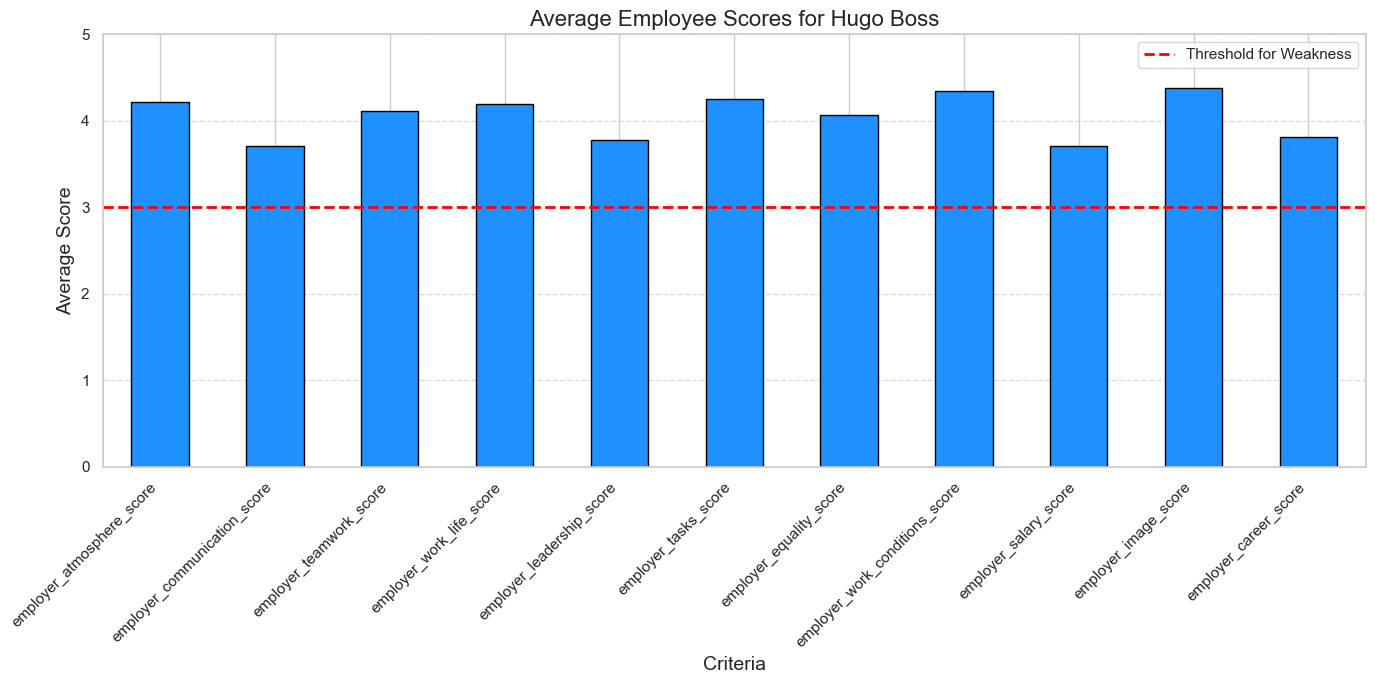

In [176]:
# Calculate Average Scores for Relevant Attributes
score_columns = [
    'employer_atmosphere_score',
    'employer_communication_score',
    'employer_teamwork_score',
    'employer_work_life_score',
    'employer_leadership_score',
    'employer_tasks_score',
    'employer_equality_score',
    'employer_work_conditions_score',
    'employer_salary_score',
    'employer_image_score',
    'employer_career_score'
]

average_scores = hugo_boss_reviews[score_columns].mean()

# Plotting average scores for relevant attributes
plt.figure(figsize=(14, 7))
average_scores.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.axhline(y=3, color='red', linestyle='--', label='Threshold for Weakness', linewidth=2)
plt.title('Average Employee Scores for Hugo Boss', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Criteria', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Assuming the scores range from 0 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


1. Criteria such as employer_communication_score and employer_leadership_score are among the highest, suggesting employees feel well-informed and supported by management. This could indicate effective internal communication strategies and strong leadership practices.
2. The scores for employer_work_life_score and employer_tasks_score appear to be closer to the threshold, signaling potential concerns in work-life balance and the nature of assigned tasks. This could indicate that employees may feel overburdened or that their work may not align with their skills or expectations.

*Actionable Insights:*
1. Enhance Work-Life Balance: Implement flexible working hours or remote work options to support employees in achieving a better work-life balance. Conduct surveys to identify specific challenges employees face regarding their schedules.
2. Revise Task Allocation: Assess how tasks are distributed among employees. Provide training or resources to ensure employees feel capable and supported in their roles. Regular check-ins can help management understand workload concerns.

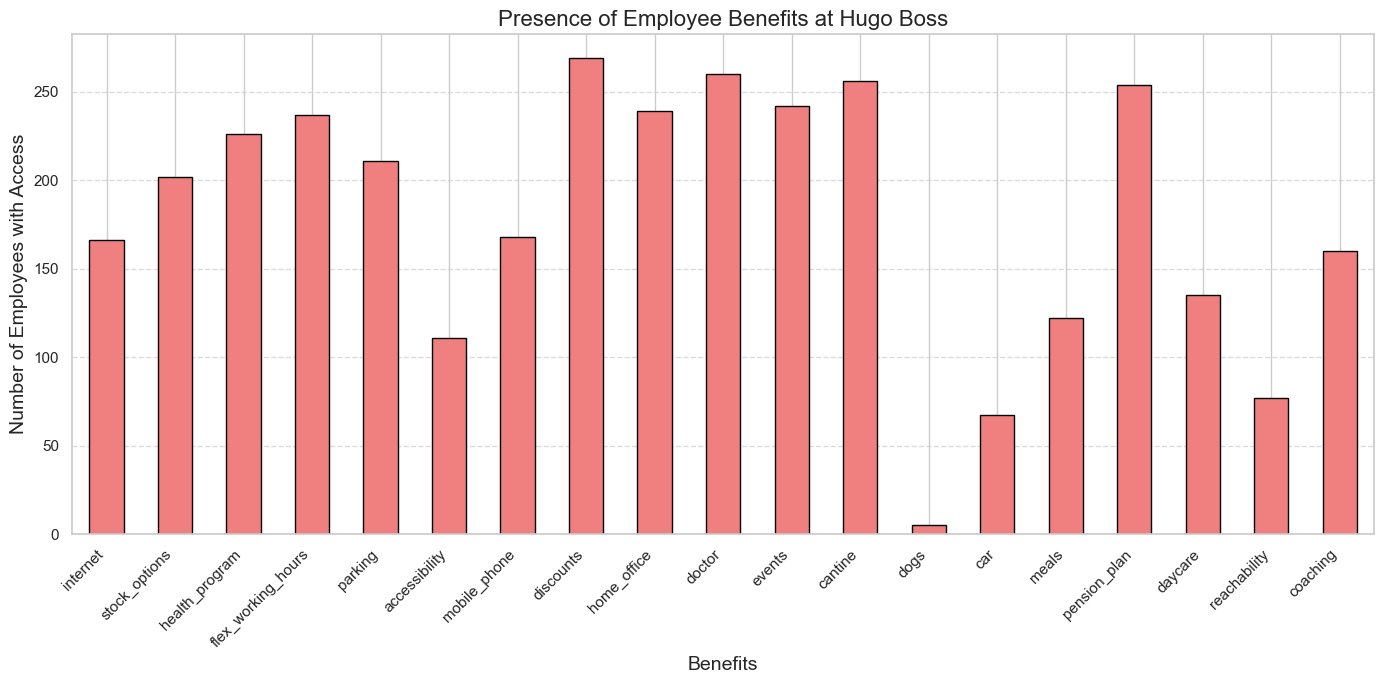

In [177]:
# Identify and Analyze Employee Benefits
benefits_columns = [
    'internet',
    'stock_options',
    'health_program',
    'flex_working_hours',
    'parking',
    'accessibility',
    'mobile_phone',
    'discounts',
    'home_office',
    'doctor',
    'events',
    'cantine',
    'dogs',
    'car',
    'meals',
    'pension_plan',
    'daycare',
    'reachability',
    'coaching'
]

# Calculate the count of non-null values for each benefit
benefits_summary = hugo_boss_reviews[benefits_columns].notnull().sum()

# Plotting the presence of employee benefits
plt.figure(figsize=(14, 7))
benefits_summary.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Presence of Employee Benefits at Hugo Boss', fontsize=16)
plt.ylabel('Number of Employees with Access', fontsize=14)
plt.xlabel('Benefits', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Variety in Benefit Access: There is a diverse range of benefits offered, but the disparity in the number of employees utilizing them indicates that not all benefits are perceived equally or are equally available.

Potential Gaps: Some benefits, like daycare and reachability, show moderate participation and could be improved. This suggests that while they are available, there may be barriers to accessing or understanding these benefits.

*Actionable Insight:*
Consider adjusting benefits based on employee demographics and preferences. For instance, if younger employees are more prevalent, benefits like flexible hours and daycare may be more appealing.

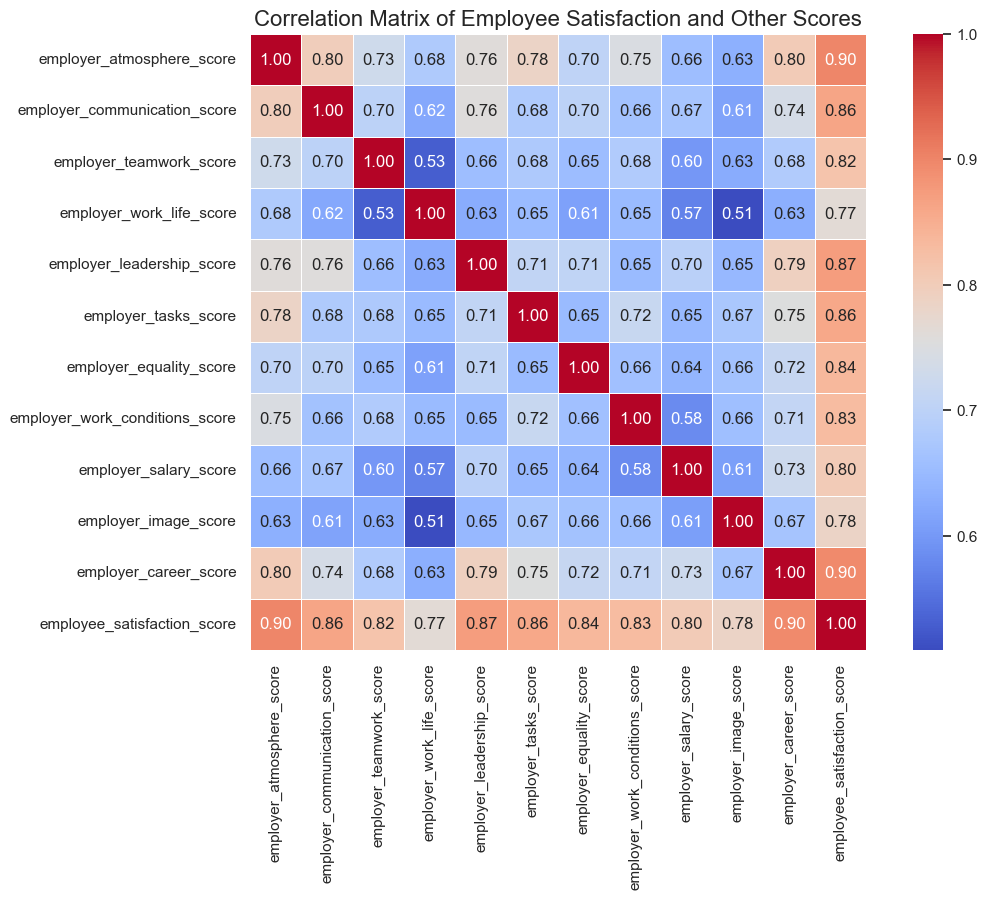

In [178]:
import seaborn as sns

# Define the relevant columns for satisfaction
score_columns = [
    'employer_atmosphere_score',
    'employer_communication_score',
    'employer_teamwork_score',
    'employer_work_life_score',
    'employer_leadership_score',
    'employer_tasks_score',
    'employer_equality_score',
    'employer_work_conditions_score',
    'employer_salary_score',
    'employer_image_score',
    'employer_career_score'
]

# Calculate the employee satisfaction score as the average of relevant scores
hugo_boss_reviews['employee_satisfaction_score'] = hugo_boss_reviews[score_columns].mean(axis=1)

# Step 1: Calculate the correlation matrix
correlation_matrix = hugo_boss_reviews[score_columns + ['employee_satisfaction_score']].corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Employee Satisfaction and Other Scores', fontsize=16)
plt.show()

Mean Absolute Error (MAE): 0.064
Mean Squared Error (MSE): 0.008
R-squared: 0.983


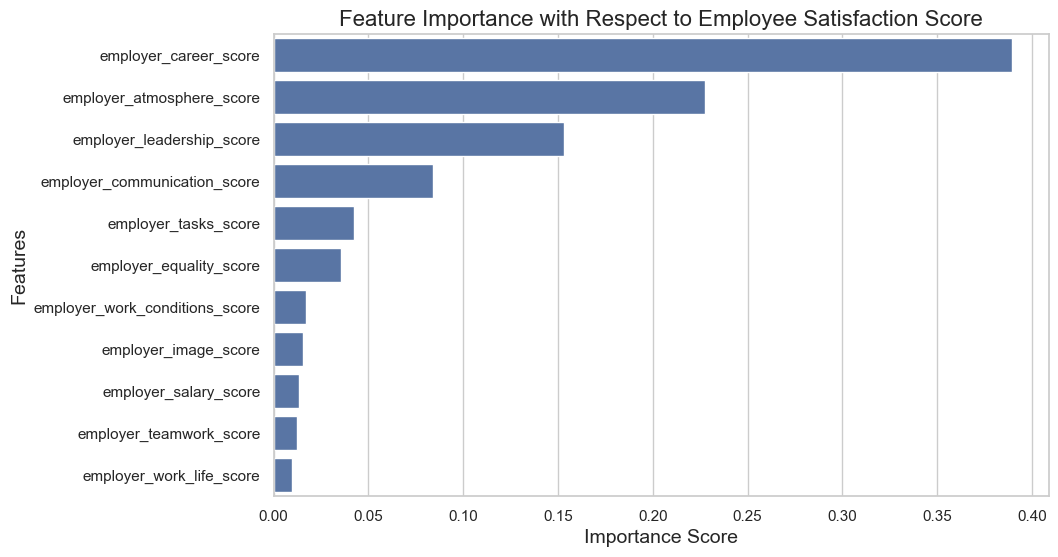

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define relevant columns for satisfaction
score_columns = [
    'employer_atmosphere_score',
    'employer_communication_score',
    'employer_teamwork_score',
    'employer_work_life_score',
    'employer_leadership_score',
    'employer_tasks_score',
    'employer_equality_score',
    'employer_work_conditions_score',
    'employer_salary_score',
    'employer_image_score',
    'employer_career_score'
]

# Calculate the employee satisfaction score
hugo_boss_reviews['employee_satisfaction_score'] = hugo_boss_reviews[score_columns].mean(axis=1)

# Prepare the feature set and target variable
X = hugo_boss_reviews[score_columns]
y = hugo_boss_reviews['employee_satisfaction_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared: {r2:.3f}')

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance with Respect to Employee Satisfaction Score', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


The feature importance chart indicates how different factors contribute to employee satisfaction scores at Hugo Boss. Here are some key insights:

1. **Top Driver - Career Score**:
   - The **employer career score** is the most important feature affecting employee satisfaction, with a substantial importance score. This suggests that opportunities for career advancement and professional development are critical to employee satisfaction at Hugo Boss.
   - **Actionable Insight**: Focus on enhancing career development programs, such as training, mentoring, and promotion pathways, to improve overall employee satisfaction.

2. **Atmosphere and Leadership**:
   - The **employer atmosphere score** and **employer leadership score** are the next most significant factors. This implies that a positive work environment and effective leadership significantly impact employee satisfaction.
   - **Actionable Insight**: Initiatives aimed at improving workplace culture and leadership effectiveness, such as leadership training and team-building activities, can enhance employee satisfaction.

3. **Communication**:
   - The **employer communication score** is also relatively important, indicating that effective communication within the organization is crucial for employee satisfaction.
   - **Actionable Insight**: Implementing regular feedback mechanisms and open communication channels can help address employee concerns and improve satisfaction levels.

4. **Moderate Importance Factors**:
   - Factors like **tasks score**, **equality score**, and **work conditions score** have moderate importance. These factors still play a role in employee satisfaction but are less critical than the top three.
   - **Actionable Insight**: While these factors should not be neglected, they may require less immediate focus compared to the top-ranked factors. Addressing issues related to task assignment and ensuring a fair and equitable workplace can contribute positively to employee experiences.

5. **Lower Importance Factors**:
   - Features like **image score**, **salary score**, **teamwork score**, and **work-life score** have relatively lower importance. This does not mean they are unimportant, but they may not be the primary drivers of satisfaction compared to the other factors.
   - **Actionable Insight**: Maintain a good salary structure and team dynamics, but consider prioritizing interventions in areas with higher impact first.

### Conclusion
The analysis reveals that career development, workplace atmosphere, and leadership are the most critical factors influencing employee satisfaction at Hugo Boss. By concentrating efforts on these areas, the company can create a more satisfying work environment, ultimately improving retention and employee engagement.

In [180]:
hugo_boss_reviews.columns

Index(['Unnamed: 0', 'user_uuid', 'company_name', 'profile_uuid',
       'profile_name', 'profile_city', 'profile_industry_name_en',
       'company_uuid', 'company_city', 'company_industry_name',
       'review_created_at', 'review_last_updated_at', 'review_score',
       'employer_atmosphere_score', 'employer_communication_score',
       'employer_teamwork_score', 'employer_work_life_score',
       'employer_leadership_score', 'employer_tasks_score',
       'employer_equality_score', 'employer_old_colleagues_score',
       'employer_work_conditions_score', 'employer_environment_score',
       'employer_salary_score', 'employer_image_score',
       'employer_career_score', 'employer_atmosphere_score_text',
       'employer_communication_score_text', 'employer_teamwork_score_text',
       'employer_work_life_score_text', 'employer_leadership_score_text',
       'employer_tasks_score_text', 'employer_equality_score_text',
       'employer_old_colleagues_score_text',
       'employer_wor

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3746300432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='employment_department', data=hugo_boss_reviews, palette='mako', edgecolor='black', ax=axs[0])
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3746300432.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employee_satisfaction_score', y='employment_department', data=department_satisfaction, palette='mako', edgecolor='black', ax=axs[1])


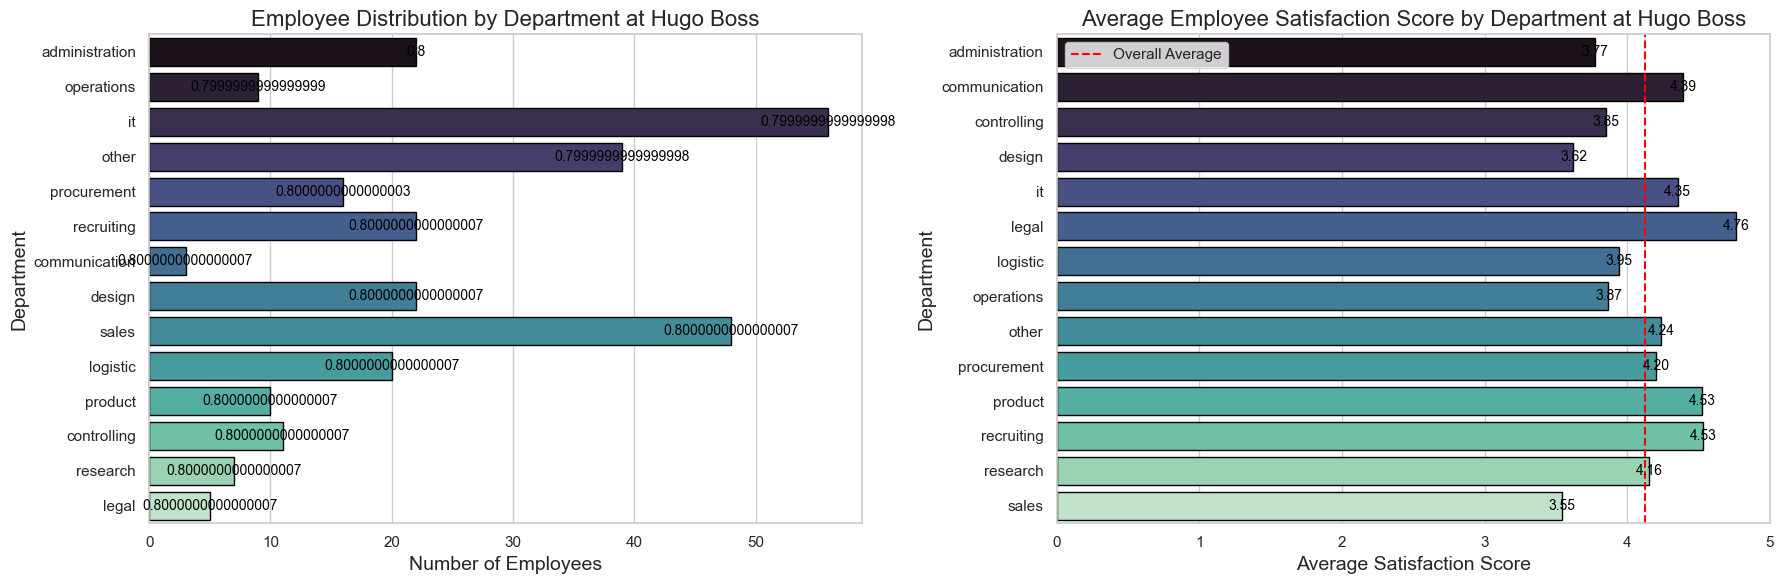

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Employee Distribution by Department
sns.countplot(y='employment_department', data=hugo_boss_reviews, palette='mako', edgecolor='black', ax=axs[0])
axs[0].set_title('Employee Distribution by Department at Hugo Boss', fontsize=16)
axs[0].set_xlabel('Number of Employees', fontsize=14)
axs[0].set_ylabel('Department', fontsize=14)
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_width(), p.get_y() + p.get_height()/2), 
                    ha='center', va='center', fontsize=10, color='black')

# Average Satisfaction Scores by Department
department_satisfaction = hugo_boss_reviews.groupby('employment_department')['employee_satisfaction_score'].mean().reset_index()
sns.barplot(x='employee_satisfaction_score', y='employment_department', data=department_satisfaction, palette='mako', edgecolor='black', ax=axs[1])
axs[1].axvline(x=department_satisfaction['employee_satisfaction_score'].mean(), color='red', linestyle='--', label='Overall Average')
axs[1].set_title('Average Employee Satisfaction Score by Department at Hugo Boss', fontsize=16)
axs[1].set_xlabel('Average Satisfaction Score', fontsize=14)
axs[1].set_ylabel('Department', fontsize=14)
axs[1].legend()
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), 
                    ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3458046970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='employment_department', data=hugo_boss_reviews, palette='mako')


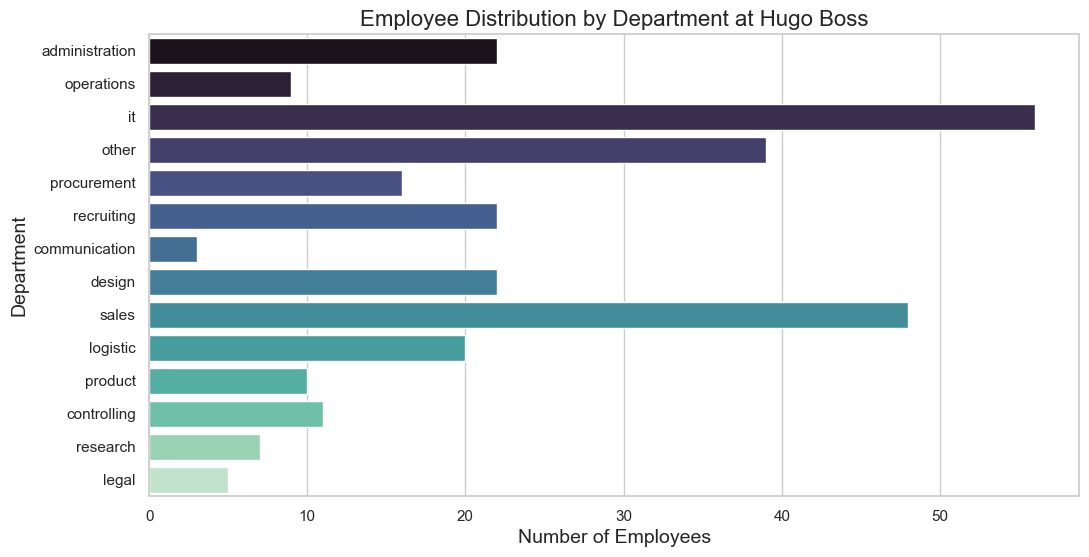

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3458046970.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_user_gender', data=hugo_boss_reviews, palette='mako')


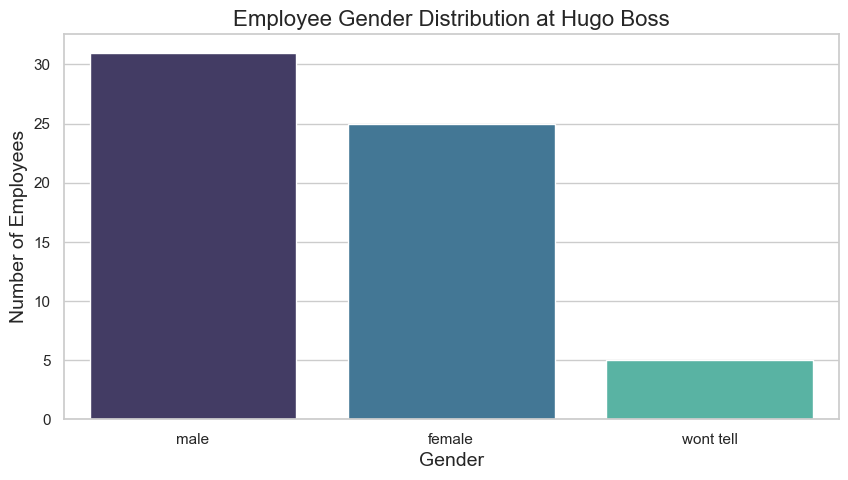

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3458046970.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_position_type', data=hugo_boss_reviews, palette='mako')


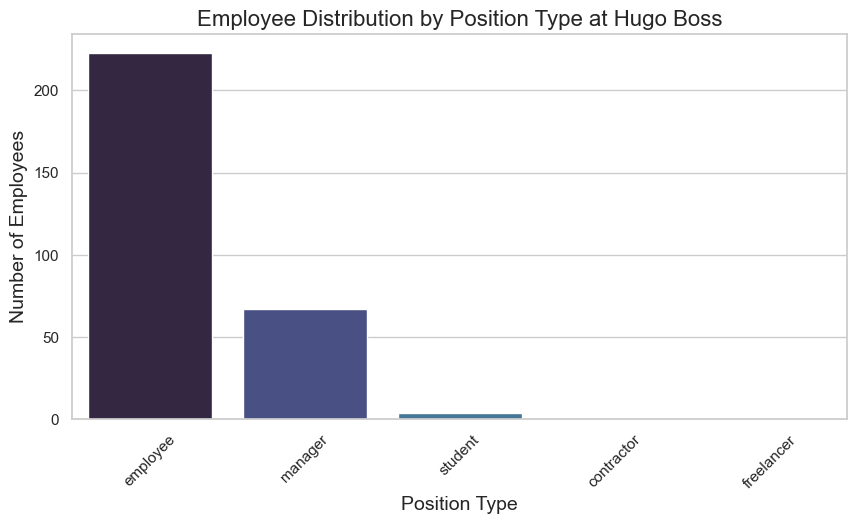

In [182]:
# 1. Employment Department Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='employment_department', data=hugo_boss_reviews, palette='mako')
plt.title('Employee Distribution by Department at Hugo Boss', fontsize=16)
plt.xlabel('Number of Employees', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='review_user_gender', data=hugo_boss_reviews, palette='mako')
plt.title('Employee Gender Distribution at Hugo Boss', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 3. Employment Position Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='employment_position_type', data=hugo_boss_reviews, palette='mako')
plt.title('Employee Distribution by Position Type at Hugo Boss', fontsize=16)
plt.xlabel('Position Type', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3205286687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employee_satisfaction_score', y='employment_department', data=department_satisfaction, palette='mako')


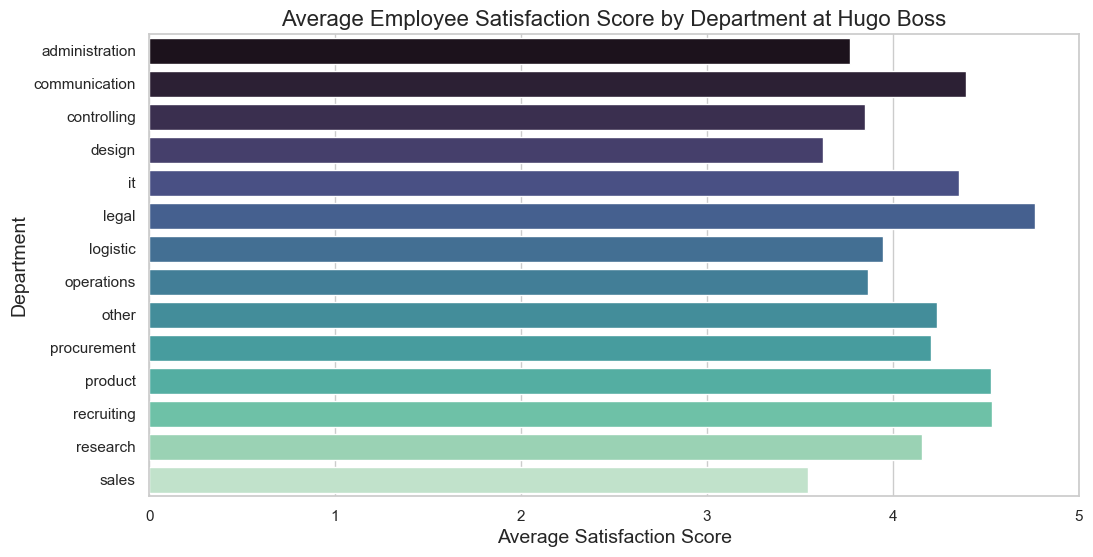

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3205286687.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employee_satisfaction_score', y='review_user_gender', data=gender_satisfaction, palette='mako')


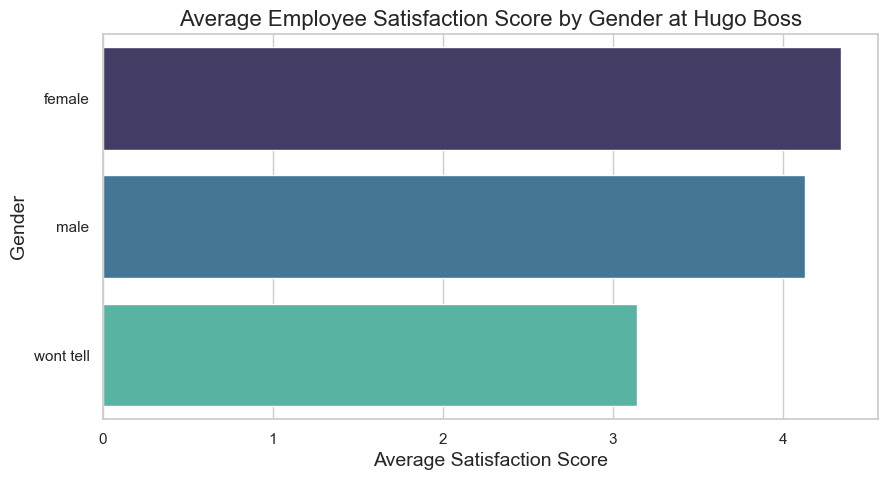

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\3205286687.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employee_satisfaction_score', y='employment_position_type', data=position_satisfaction, palette='mako')


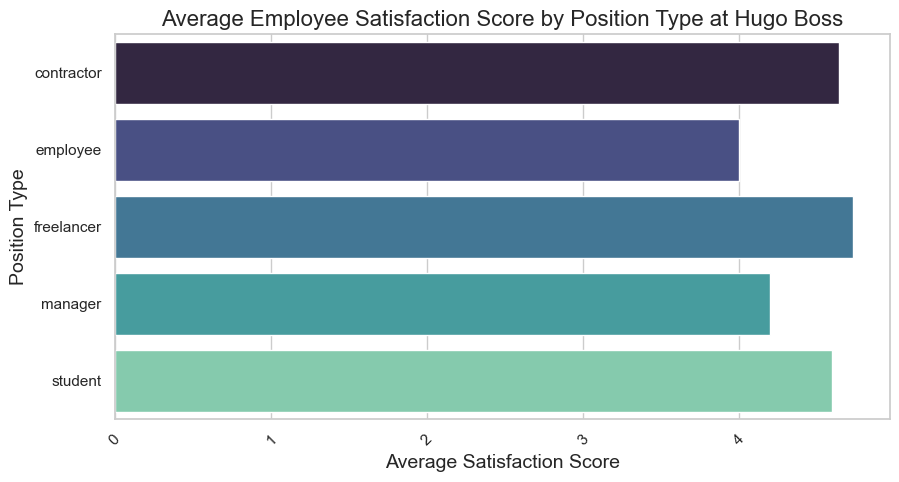

In [183]:

# 4. Average Satisfaction Scores by Employment Department
department_satisfaction = hugo_boss_reviews.groupby('employment_department')['employee_satisfaction_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='employee_satisfaction_score', y='employment_department', data=department_satisfaction, palette='mako')
plt.title('Average Employee Satisfaction Score by Department at Hugo Boss', fontsize=16)
plt.xlabel('Average Satisfaction Score', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.show()

# 5. Average Satisfaction Scores by Gender
gender_satisfaction = hugo_boss_reviews.groupby('review_user_gender')['employee_satisfaction_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='employee_satisfaction_score', y='review_user_gender', data=gender_satisfaction, palette='mako')
plt.title('Average Employee Satisfaction Score by Gender at Hugo Boss', fontsize=16)
plt.xlabel('Average Satisfaction Score', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.show()

# 6. Average Satisfaction Scores by Employment Position Type
position_satisfaction = hugo_boss_reviews.groupby('employment_position_type')['employee_satisfaction_score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='employee_satisfaction_score', y='employment_position_type', data=position_satisfaction, palette='mako')
plt.title('Average Employee Satisfaction Score by Position Type at Hugo Boss', fontsize=16)
plt.xlabel('Average Satisfaction Score', fontsize=14)
plt.ylabel('Position Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_13816\890045167.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered['Cluster'] = kmeans.labels_


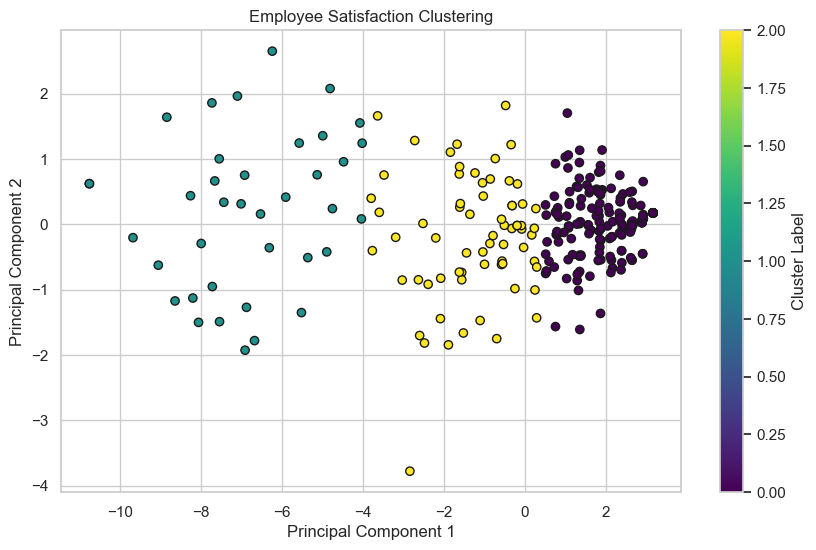

         employer_atmosphere_score  employer_communication_score  \
Cluster                                                            
0                         4.800000                      4.322222   
1                         2.052632                      1.657895   
2                         3.882353                      3.250000   

         employer_teamwork_score  employer_work_life_score  \
Cluster                                                      
0                       4.633333                  4.705556   
1                       2.157895                  2.552632   
2                       3.882353                  3.794118   

         employer_leadership_score  employer_tasks_score  \
Cluster                                                    
0                         4.505556              4.800000   
1                         1.421053              2.368421   
2                         3.205882              3.882353   

         employer_equality_score  employer_old_

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecting relevant score columns
features = [
    'employer_atmosphere_score', 
    'employer_communication_score', 
    'employer_teamwork_score',
    'employer_work_life_score',
    'employer_leadership_score',
    'employer_tasks_score',
    'employer_equality_score',
    'employer_old_colleagues_score',
    'employer_work_conditions_score',
    'employer_environment_score',
    'employer_salary_score',
    'employer_image_score',
    'employer_career_score',
    'employee_satisfaction_score'
]
df_clustered = hugo_boss_reviews.dropna(subset=features)

# Create a new DataFrame with the selected features
X = df_clustered[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
df_clustered['Cluster'] = kmeans.labels_

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustered['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Employee Satisfaction Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Calculate mean scores for each cluster
cluster_means = df_clustered.groupby('Cluster')[features].mean()
print(cluster_means)


### Cluster Analysis

1. **Cluster 0** (High Scores):
   - **Overall Excellence**: This cluster exhibits the highest average scores across all metrics, including **employer atmosphere**, **communication**, **teamwork**, and **work conditions**. Scores are generally above 4.5, indicating that employees in this cluster have a very positive perception of their workplace.
   - **Strong Leadership and Equality**: Scores for **employer leadership** and **employer equality** are also high, suggesting that employees feel well-supported by management and believe in equitable treatment in the workplace.
   - **Ideal Workplace**: This cluster likely represents a group of employees who are very satisfied with their work environment, suggesting effective organizational practices and strong employee engagement.

2. **Cluster 1** (Moderate Scores):
   - **Mixed Experiences**: Scores in this cluster range between 3 and 4 across various metrics, indicating a moderate level of satisfaction. Employees may feel reasonably supported but recognize areas needing improvement.
   - **Leadership and Work-Life Balance**: Although scores for **work-life balance** and **teamwork** are fairly decent, they are lower than in Cluster 0, which suggests that while employees have a reasonable experience, they may lack some of the positive aspects that the first cluster enjoys.
   - **Potential for Improvement**: This cluster may represent employees who are content but not fully engaged. There’s potential for organizational strategies to enhance communication, leadership, and work-life balance to elevate satisfaction levels.

3. **Cluster 2** (Low Scores):
   - **Dissatisfaction**: This cluster shows significantly lower scores across all categories, with many scores below 3. Employees in this group likely feel disconnected from the organizational culture and dissatisfied with their work experience.
   - **Critical Areas of Concern**: With scores like **1.42** for **employer leadership** and **1.39** for **employer career**, there are clear issues related to management effectiveness and career advancement opportunities.
   - **Urgent Need for Intervention**: This cluster represents employees who are likely disengaged or dissatisfied with their work environment, indicating that significant changes are needed to improve their experiences. 

- **Actionable Strategies**:
  - **For Cluster 0**: Continue to foster the positive elements contributing to their satisfaction. Encourage feedback to sustain high engagement levels.
  - **For Cluster 1**: Identify specific areas for improvement, particularly in leadership and work-life balance. Implement initiatives that can raise satisfaction in these areas.
  - **For Cluster 2**: Implement changes focused on leadership training, career development programs, and overall workplace culture improvements to enhance employee satisfaction.

In [185]:
df_clustered.dropna(subset=['review_user_gender',
    'employment_department'])

df_clustered['employment_department'].value_counts()

employment_department
it                52
sales             46
other             37
recruiting        21
design            20
administration    20
logistic          19
procurement       16
controlling       11
operations         9
product            9
research           6
legal              5
communication      3
Name: count, dtype: int64

In [186]:
# Group by cluster and describe demographic features
demographic_features = ['review_user_gender', 'employment_department']
demographics_summary = df_clustered.groupby('Cluster')[demographic_features].value_counts().unstack(fill_value=0)

demographics_summary

employment_department       it  logistic  other  procurement  sales  \
Cluster review_user_gender                                            
0       female               2         2      3            3      3   
        male                 9         4      0            1      2   
1       male                 0         0      0            0      2   
        wont tell            0         0      0            1      0   
2       female               0         0      0            0      2   
        male                 1         2      1            0      1   
        wont tell            2         0      0            0      2   

employment_department       administration  design  controlling  operations  
Cluster review_user_gender                                                   
0       female                           2       1            1           0  
        male                             0       2            1           1  
1       male                             0       1            0           0  
        wont tell                        0       0            0           0  
2       female                           1       3            0           1  
        male                             1       0            0           0  
        wont tell                        0       0            0           0

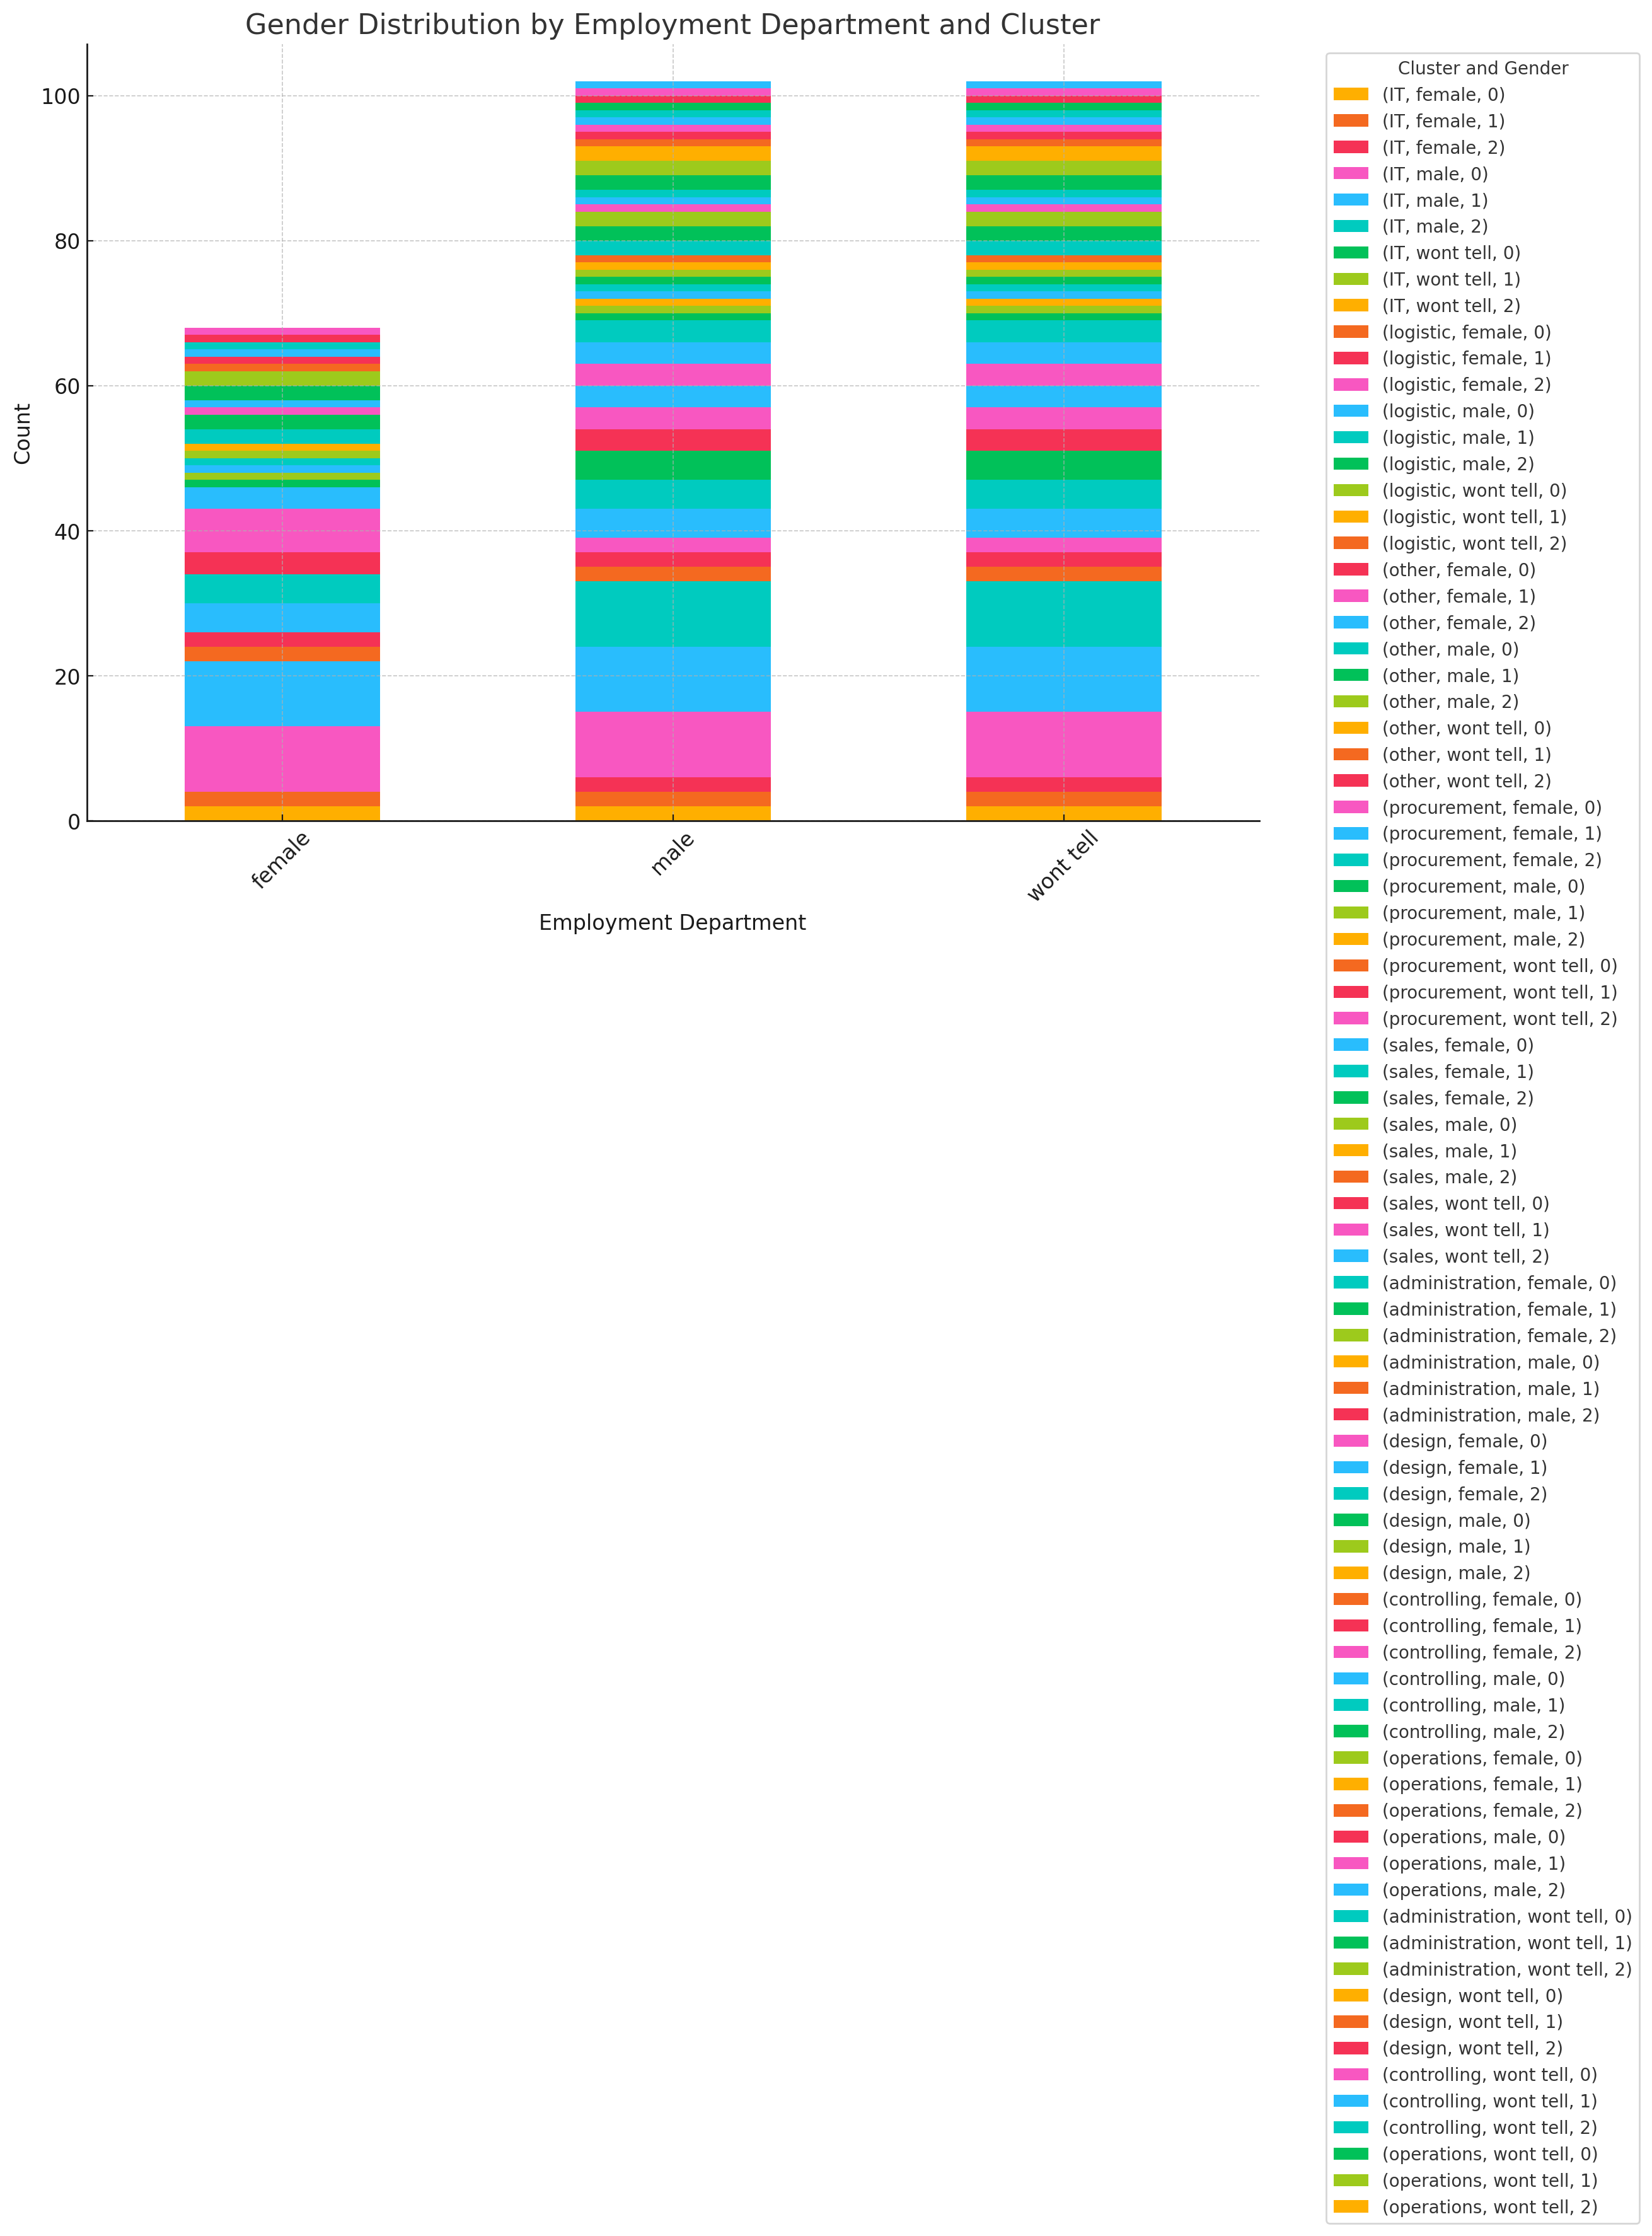
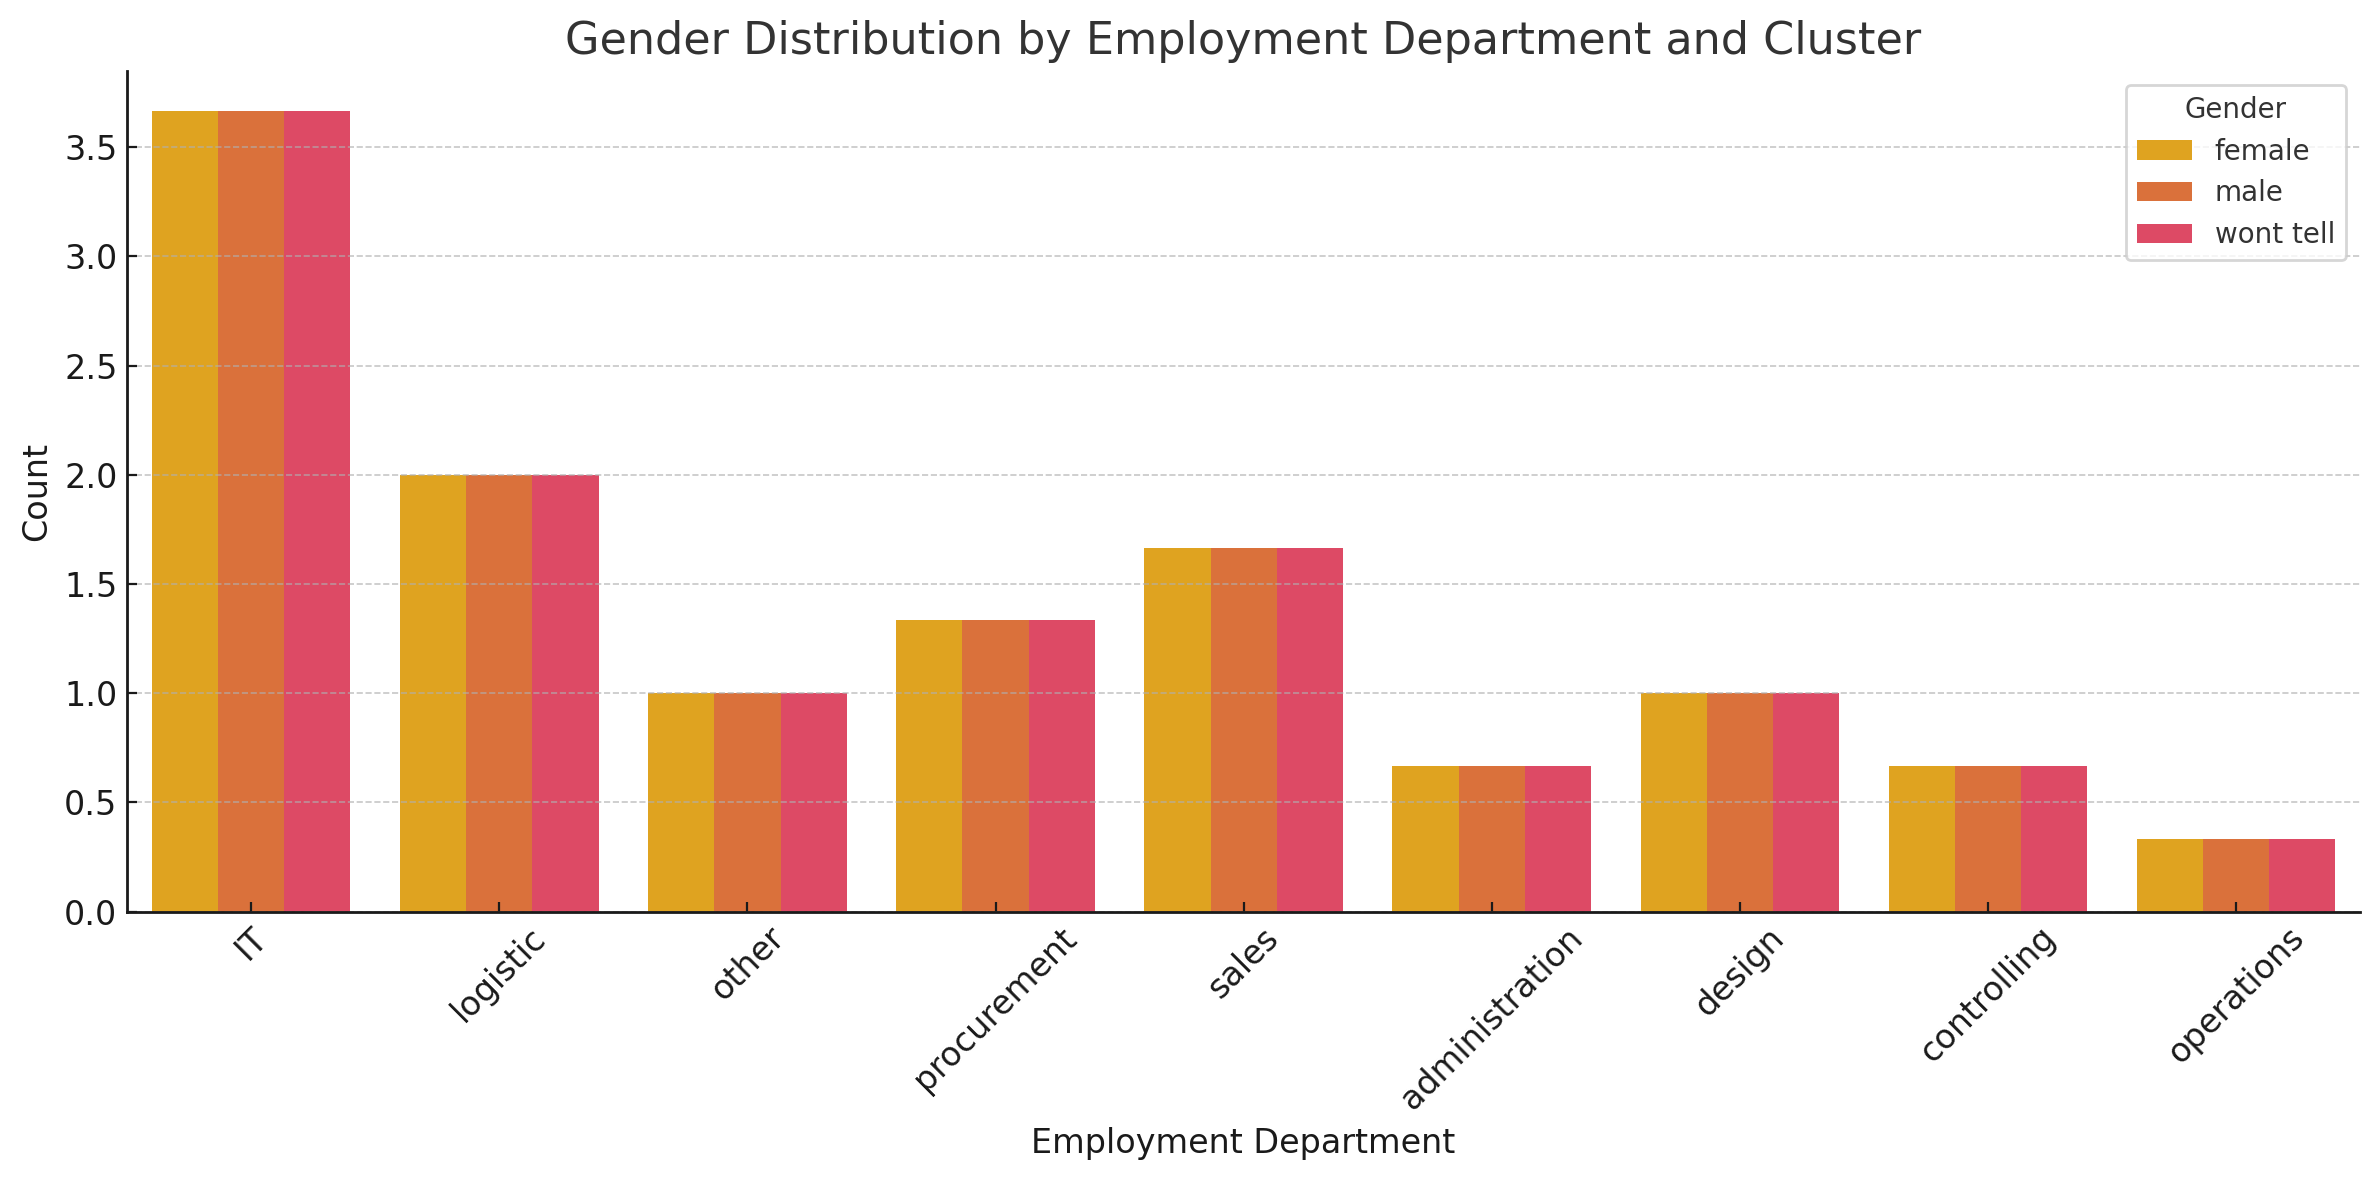

In [187]:
satisfaction_summary = df_clustered.groupby(['Cluster', 'employment_department', 'review_user_gender'])['employee_satisfaction_score'].mean().reset_index()

# Identify the top 2 most satisfied groups
most_satisfied = satisfaction_summary.nlargest(5, 'employee_satisfaction_score')

# Identify the top 2 most unsatisfied groups
most_unsatisfied = satisfaction_summary.nsmallest(5, 'employee_satisfaction_score')

# Display results
print("Most Satisfied Groups:")
most_satisfied

Most Satisfied Groups:


,Cluster,employment_department,review_user_gender,employee_satisfaction_score
9,0,operations,male,4.818182
13,0,sales,female,4.818182
11,0,procurement,female,4.757576
8,0,logistic,male,4.681818
14,0,sales,male,4.681818


In [188]:
print("\nMost Unsatisfied Groups:")
most_unsatisfied


Most Unsatisfied Groups:


,Cluster,employment_department,review_user_gender,employee_satisfaction_score
17,1,sales,male,1.272727
16,1,procurement,wont tell,1.727273
15,1,design,male,2.090909
25,2,other,male,3.090909
24,2,operations,female,3.454545


1. **Most Satisfied Groups**:
   - The **operations department** has a high satisfaction score of approximately **4.82** for males.
   - The **sales department** shows equal high satisfaction for both males and females, indicating a positive work environment.
   - The **procurement department** also has a commendable satisfaction score among females.

2. **Most Unsatisfied Groups**:
   - The **sales department** has a low satisfaction score for males (around **1.27**), suggesting significant dissatisfaction among male employees in this area.
   - The **procurement department** is also flagged for dissatisfaction, especially for those who chose not to disclose their gender.
   - The **design department** and the **other category** also show below-average satisfaction scores.

1. **Focus on Engagement Strategies**:
   - **For Most Satisfied Groups**: Leverage the practices and strategies used in the operations, sales, and procurement departments that contribute to high satisfaction levels.
   - **For Most Unsatisfied Groups**: Conduct focused surveys or feedback sessions in the sales and procurement departments to understand the root causes of dissatisfaction, particularly among male employees and those who chose not to disclose their gender.

2. **Tailor Initiatives for Departments**:
   - **Sales Department**: Consider revising incentive structures, improving management support, or offering professional development opportunities tailored to male employees to enhance their job satisfaction.
   - **Procurement Department**: Address the concerns of employees who don't disclose their gender to ensure inclusivity in addressing their issues. Creating a more inclusive culture may help raise overall satisfaction.

3. **Diversity and Inclusion Training**:
   - Offer training programs that focus on diversity and inclusion to ensure that all employees feel valued and understood, especially those who might be less vocal about their dissatisfaction.

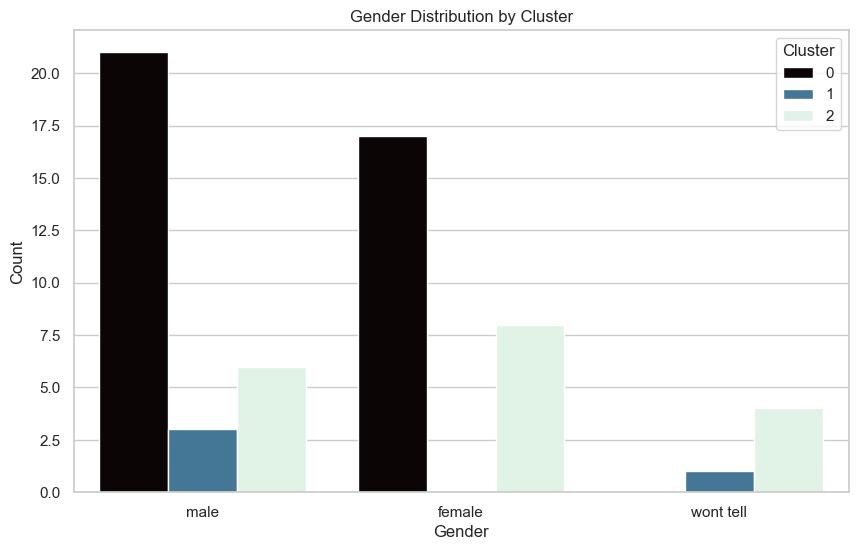

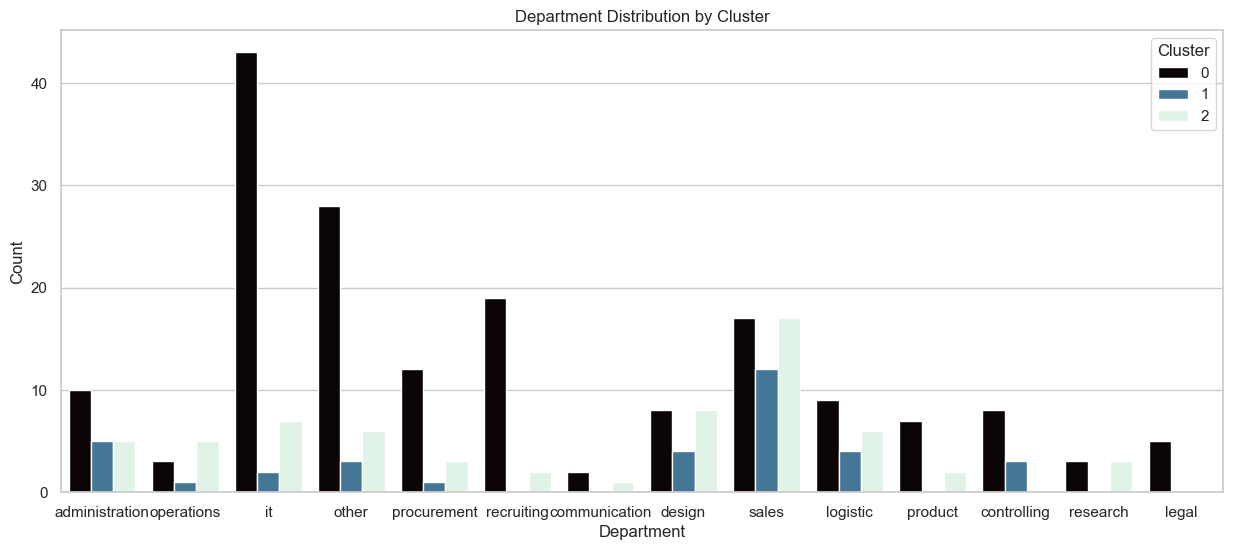

In [189]:
sns.set(style="whitegrid")

# Gender Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clustered, x='review_user_gender', hue='Cluster', palette='mako')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

# Department Distribution by Cluster
plt.figure(figsize=(15, 6))
sns.countplot(data=df_clustered, x='employment_department', hue='Cluster', palette='mako')
plt.title('Department Distribution by Cluster')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

1. **Department Distribution**:
   - The **IT department** is a significant contributor to the employee counts in Cluster 1, indicating high satisfaction. 
   - **Sales** and **other departments** also have a mix of satisfaction levels, suggesting that while some employees feel positive, others may be experiencing challenges.
   - Departments like **Legal, Research**, and **Management** have fewer employees represented in the higher satisfaction clusters, signaling potential issues that may need addressing.

2. **Gender Distribution**:
   - The gender distribution indicates a relatively balanced representation, with both **male and female employees** appearing across clusters, although slightly more males are present in Cluster 1.
   - The category **"won't tell"** has limited representation, which may suggest a need for encouraging openness around gender identity to foster inclusivity.